# Classifier
Supervised learning, straight-forward. We try to predict sentiment by text inputs.

In [1]:
import pandas as pd
from fastai import *
from fastai.text import *

In [2]:
path = Path('/Users/jiajunkoh/projects/aa-nps')

In [3]:
data_lm = load_data(path, 'data/data_lm_export.pkl')

In [4]:
data_clas = TextClasDataBunch.from_csv(path, 'data/preproc_2019.csv', vocab=data_lm.train_ds.vocab, bs=32)

In [ ]:
data_clas.show_batch()

In [6]:
data_clas.save('data/data_clas_export.pkl')

In [7]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.2)
learn.load_encoder('encoder')

In [8]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


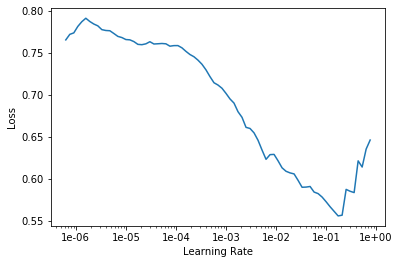

In [9]:
learn.recorder.plot()

In [10]:
learn.fit_one_cycle(1, 1e-3, moms=(0.8, 0.7))
learn.save('classifier_checkpoint_1')

epoch,train_loss,valid_loss,accuracy,time
0,0.332405,0.242564,0.909102,44:32


In [11]:
learn.freeze_to(-2) # retrain the last layer
learn.fit_one_cycle(1, slice(5e-4/2., 5e-4), moms=(0.8, 0.7))
learn.save('classifier_checkpoint_2')

epoch,train_loss,valid_loss,accuracy,time
0,0.299192,0.221900,0.918052,1:13:53


In [12]:
learn.unfreeze() # retrain the entire network
learn.fit_one_cycle(1, slice(2e-4/100, 2e-4), moms=(0.8, 0.7))
learn.save('classifier_checkpoint_3')

epoch,train_loss,valid_loss,accuracy,time
0,0.271264,0.211071,0.921827,3:35:21


In [13]:
learn.export('models/classifier_model.pkl')

In [14]:
learn.predict('no delay')

(Category positive, tensor(1), tensor([0.2422, 0.7578]))

In [15]:
learn.predict('flight delay 2 hours again')

(Category negative, tensor(0), tensor([9.9995e-01, 5.1248e-05]))

In [16]:
learn.predict('web very slow')

(Category negative, tensor(0), tensor([0.9947, 0.0053]))

In [17]:
learn.predict('cabin crew very friendly')

(Category positive, tensor(1), tensor([0.0042, 0.9958]))

In [18]:
learn.predict('cabin crew offered chocolate to my kids')

(Category negative, tensor(0), tensor([0.5697, 0.4303]))

In [19]:
learn.predict('check in takes forever')

(Category negative, tensor(0), tensor([0.8301, 0.1699]))

In [20]:
learn.predict('proessing fee is too much for credit card')

(Category negative, tensor(0), tensor([0.9305, 0.0695]))

In [21]:
learn.predict('approve bank transfer and error if i use airasia app')

(Category negative, tensor(0), tensor([0.9449, 0.0551]))

In [22]:
learn.predict('it took me just a minute to get things done')

(Category negative, tensor(0), tensor([9.9966e-01, 3.4050e-04]))

In [23]:
learn.predict('your website has become friendlier and friendlier. Keep up the great work!')

(Category positive, tensor(1), tensor([0.1906, 0.8094]))

In [24]:
learn.predict('cebu pacific is shit and doesn\'t work you did a great job')

(Category negative, tensor(0), tensor([0.9604, 0.0396]))

In [25]:
learn.predict('price ok but flight delay')

(Category negative, tensor(0), tensor([0.7709, 0.2291]))

In [26]:
learn.predict('flight delay but price ok')

(Category positive, tensor(1), tensor([0.4154, 0.5846]))